In [19]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
##without this matplotlib will render somwehere outside jupyter###
%matplotlib inline

In [3]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [4]:
full_data  = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))

In [7]:
full_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [9]:
full_data['left'].unique()

array([1, 0])

In [10]:
full_data.shape

(14999, 10)

In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level: Value between 0 to 1

last_evaluation: Value between 0 to 1

number_project: No. of projects the employee has worked on

average_monthy_hours: Average hours an employee works per month

time_spend_company: No. of years spent in a company

Work_accident: Boolean value 0 or 1 indicating if an employee had accident

promotion_last_5years: Boolean value 0 or 1 indicating if an employee was promoted

left: Boolean value 0 or 1 indicating if an employee left the company

In [12]:
full_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
count_left = np.count_nonzero(full_data.left == 1)
count_promo = np.count_nonzero(full_data.promotion_last_5years == 1)
count_accidents = np.count_nonzero(full_data.Work_accident == 1)
left_percent = float(count_left) / float(full_data.shape[0]) * 100
print("%s out of %s have left the company" % (count_left, full_data.shape[0]))

print("%s out of %s have got promotion" % (count_promo, full_data.shape[0]))

print("%s out of %s have been in an accident" % (count_accidents, full_data.shape[0]))

print("%s percent of people have left the company" % (left_percent))

3571 out of 14999 have left the company
319 out of 14999 have got promotion
2169 out of 14999 have been in an accident
23.80825388359224 percent of people have left the company


<Axes: xlabel='left', ylabel='count'>

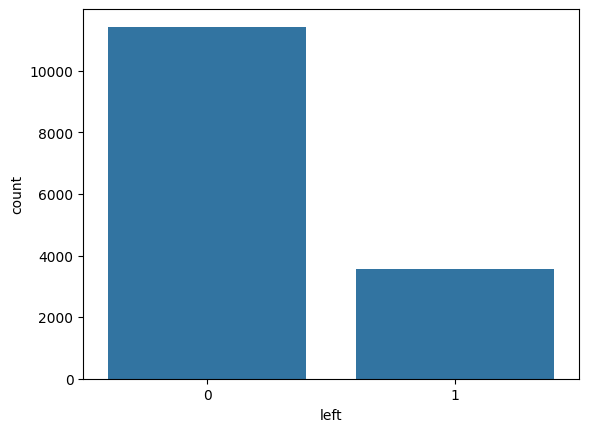

In [23]:
sns.countplot(x='left', data=full_data)

In [39]:
full_data_2 = pd.get_dummies(full_data, drop_first=True)
encoded = list(full_data_2.columns)

print(encoded)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium']


In [37]:
full_data_2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False


In [40]:
Y = full_data_2.pop('left')
X = full_data_2

In [41]:
print(X.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10499 samples.
Testing set has 4500 samples.


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': range(20, 100, 10),  # Explore values from 20 to 90 with a step of 10
              }  # Example for base decision tree depth
grid_search = GridSearchCV(estimator=AdaBoostClassifier(DecisionTreeClassifier()),
                           param_grid=param_grid, scoring='accuracy', cv=5)



In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': range(20, 100, 10)},
             scoring='accuracy')

In [49]:
grid_search.best_params_

{'n_estimators': 40}

In [50]:
ada_boost_model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=40, random_state=100)

ada_boost_model.fit(X_train,y_train)

pred_train =(ada_boost_model.predict(X_train))
pred_test =(ada_boost_model.predict(X_test))

print ("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, pred_train)))
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred_test)))

Accuracy score on training data: 1.0000
Accuracy score on testing data: 0.9722


In [51]:
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size = 0.5, random_state = 56)

In [52]:
pred1 = ada_boost_model.predict(X_test1)
accuracy_score(y_test1, pred1)

0.9728888888888889

In [53]:
pred2 = ada_boost_model.predict(X_test2)
accuracy_score(y_test2, pred2)

0.9715555555555555